  
  ## **<center>D207 OEM2 Task 1: EDA: EXPLORATORY DATA ANALYSIS<center>**  
    

Julia Amanda Terzin  
ID:009968680  
Mentor: Linda Howel   
1-385-428-2729    
linda.howell@wgu.edu   
February 11,2022

#### A.  Describe a real-world organizational situation or issue in the Data Dictionary you chose, by doing the following:

##### 1. Provide one question that is relevant to your chosen data set.

Is the 30-day readmission rate higher in patients with a history of diabetes?

##### 2. Explain how stakeholders in the organization could benefit from an analysis of the data.

Identifying comorbidities in patients with higher 30-day readmission rates will enable hospitals to develop treatment protocols to improve the management of hospitalized patients. (Gregory, 2018)  This benefits both the hospital by reducing costs, and the patient by improving their healthcare and reducing their out-of-pocket healthcare expenditures.

##### 3. Identify all the data in your data set that are relevant to answering your question in part A1.

The medical readmission dataset contains two data points relevant to the question,   1) "ReAdmis"- a binary categorical variable with Yes or No if the patient had a 30-day readmission and 2) "Diabetes"- a binary categorical variable with Yes or No if the patient had a history of diabetes.

#### B.  Describe the data analysis by doing the following:

##### 1. Write the code to run the analysis of the data set and 2. Provide the output and the results of any calculations from the analysis you performed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotnine as p9 
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('c:/Users/jater/Downloads/D205/medical_clean.csv')

In [3]:
#Create and display contingency table
contingency = pd.crosstab(df.ReAdmis, df.Diabetes, margins = 'True')
print(contingency)

Diabetes    No   Yes    All
ReAdmis                    
No        4591  1740   6331
Yes       2671   998   3669
All       7262  2738  10000


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes'), Text(0, 2.5, 'All')]

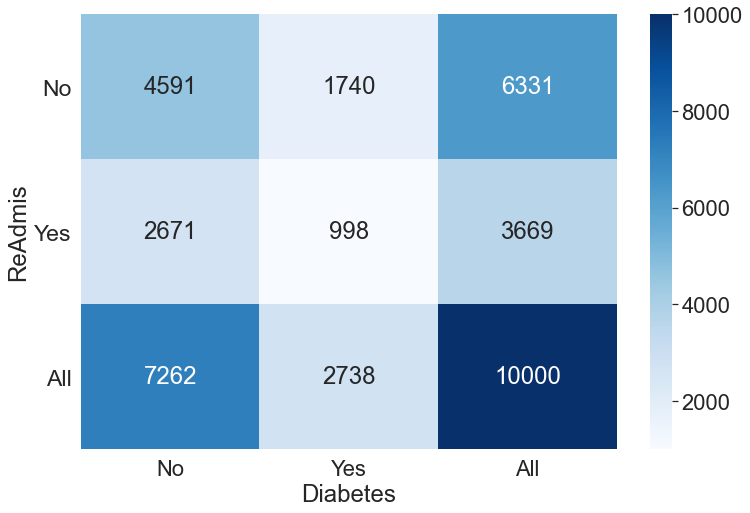

In [4]:
#Create and display heatmap of contingency table
plt.figure(figsize=(12,8))
sns.set(font_scale=2)
g = sns.heatmap(contingency, annot=True, cmap="Blues", fmt="d")
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 23)

In [5]:
#hypothesis testing -Null hypothesis = there is no relationship between these two variables.
#Chi-squared test with scipy: (what's the difference between chi2_contingency and chisquare? (stackexchange.com))
stat, p, dof, expected = chi2_contingency(contingency)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Reject Null Hypothesis')
else:
    print('Do Not Reject Null Hypothesis ')

p value is 0.9989402059725071
Do Not Reject Null Hypothesis 


##### 3. Justify why you chose this analysis technique.

I chose the chi-square test for independence because I am comparing two non-parametric categorical variables. (Bevans, 2020) The SciPy library's stats.chi2_contingency function does the computation in one line of code.

#### C.1.  Identify the distribution of two continuous variables and two categorical variables using univariate statistics from your cleaned and prepared data.

In [6]:
#First categorical variable.
df.Marital.value_counts()

Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: Marital, dtype: int64

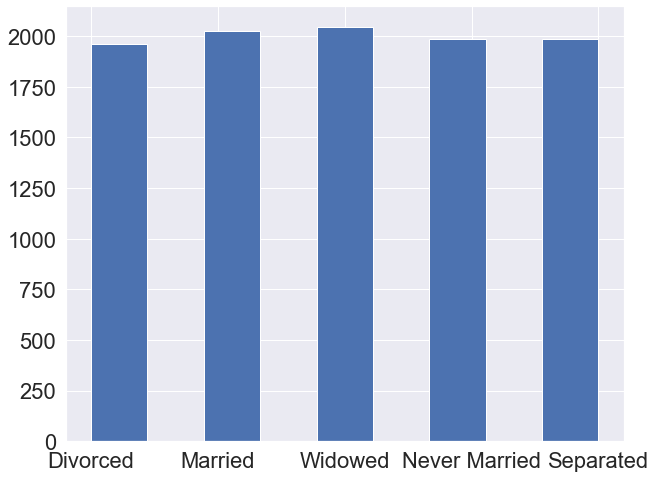

In [7]:
#First categorical variable
plt.figure(figsize=(10,8))
plt.hist(df['Marital'], bins=9)
plt.show()

 "Marital" has 5 categories with a fairly uniform distribution.

In [8]:
#Second categorical variable. "State"- 52 state two-letter codes whose frequency varies from 13 to 553.
df.State.describe()

count     10000
unique       52
top          TX
freq        553
Name: State, dtype: object

In [9]:
#Second  categorical variable
x = df['State'].value_counts(ascending=True)
x

DC     13
RI     14
DE     17
HI     34
PR     43
NV     51
WY     51
VT     60
AK     70
UT     72
NH     79
CT     80
AZ    108
ND    108
ID    109
NM    110
MT    112
ME    122
OR    122
SD    123
SC    128
MD    131
MS    134
MA    149
LA    173
NJ    176
CO    179
NE    185
AR    190
WA    191
AL    194
TN    194
IN    195
WV    207
OK    207
KY    210
WI    214
KS    220
GA    247
NC    254
MN    267
MI    273
IA    276
VA    287
FL    304
MO    328
OH    383
IL    442
NY    514
PA    547
CA    550
TX    553
Name: State, dtype: int64

Text(0, 0.5, 'State Code')

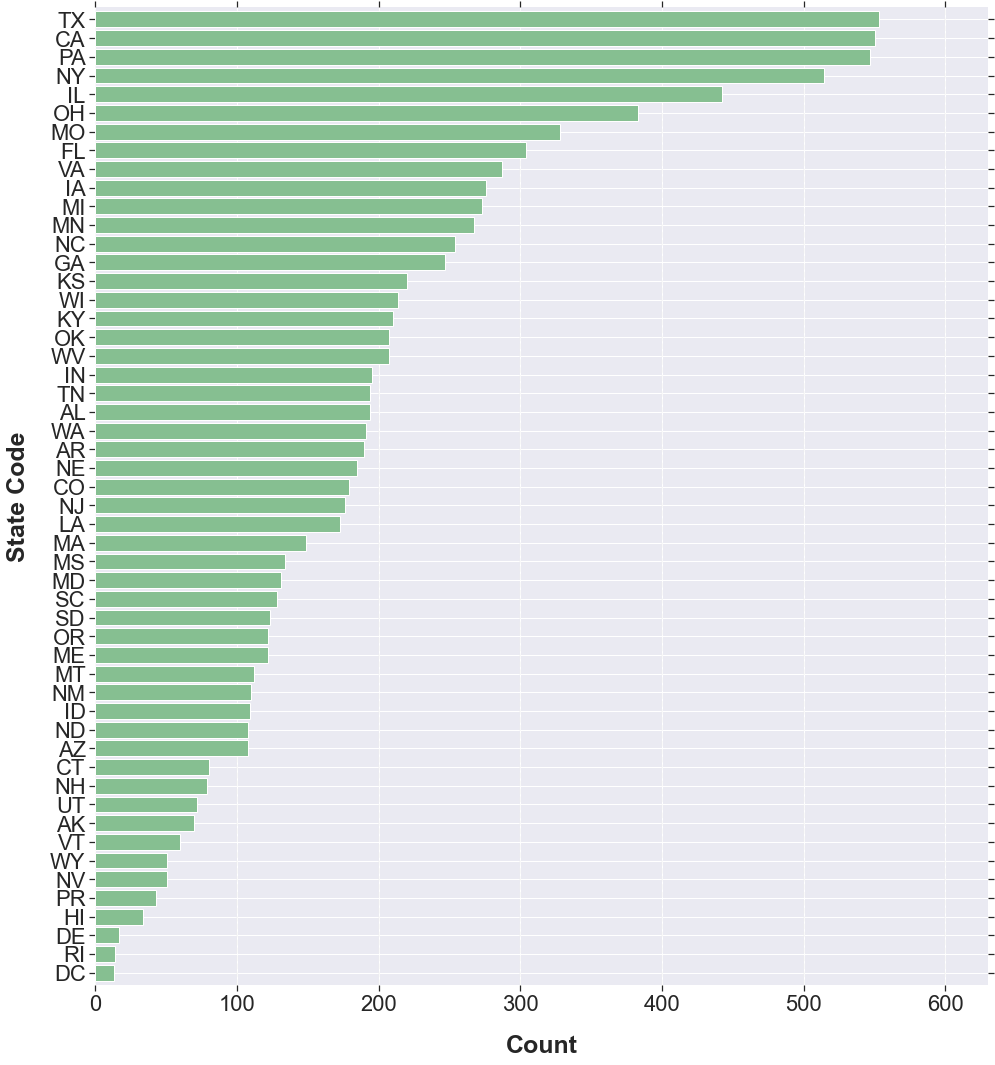

In [10]:
#Second  categorical variable.  (https://mode.com/example-gallery/python_horizontal_bar/)
ax = x.plot(kind='barh', figsize=(16,18), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", 
               labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Set x-axis label
ax.set_xlabel("Count", labelpad=20, weight='bold', size=25)

  # Set y-axis label
ax.set_ylabel("State Code", labelpad=20, weight='bold', size=25)

"State" has 52 unique state two-letter codes whose frequency varies from 13 to 553.

In [11]:
#First continuous variable.
df.Additional_charges.describe()

count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64

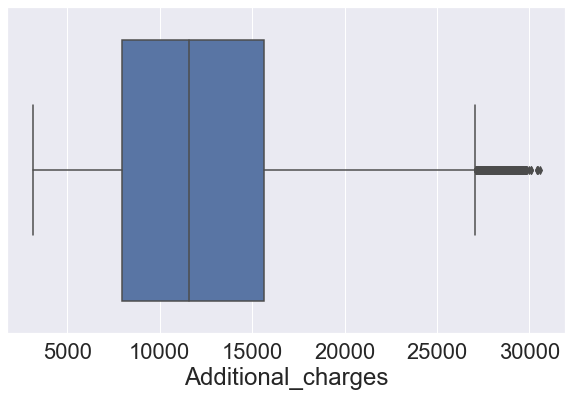

In [12]:
#First continuous variable.
plt.figure(figsize=(10,6))
boxplot= sns.boxplot(x='Additional_charges',data=df)

 "Additional_charges" has float values skewed to the left with numerous values falling outside of the maximum whisker.

In [13]:
#Second continuous variable.
df.VitD_levels.describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

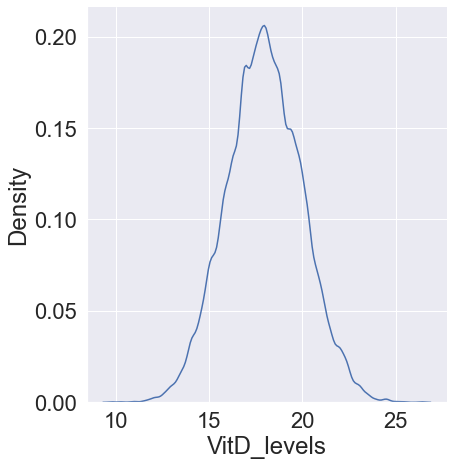

In [14]:
#Second continuous variable
sns.displot(df, x="VitD_levels", kind="kde", bw_adjust=.5, height=7, aspect=1)

"VitD_levels" has float values with a normal distribution and a standard deviation of 2.

#### D.1. Identify the distribution of two continuous variables and two categorical variables using bivariate statistics from your cleaned and prepared data.

In [15]:
df.ReAdmis.value_counts()

No     6331
Yes    3669
Name: ReAdmis, dtype: int64

In [16]:
df.Diabetes.value_counts()

No     7262
Yes    2738
Name: Diabetes, dtype: int64

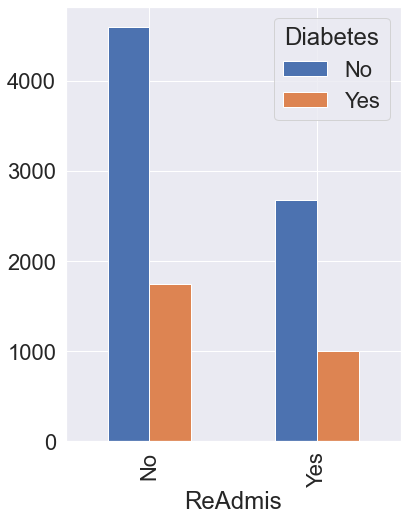

In [17]:
#Two categorical variables.
x = pd.crosstab(df.ReAdmis, df.Diabetes)
x.plot.bar(stacked=False,  figsize=(6,8))
plt.show()

"Diabetes" and "ReAdmis" have similar distributions and no apparent relationship.

In [18]:
df.Gender.value_counts()

Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

In [19]:
g = pd.crosstab(df.Gender, df.Diabetes, normalize='index')  

[Text(0, 0.5, 'Female'), Text(0, 1.5, 'Male'), Text(0, 2.5, 'Nonbinary')]

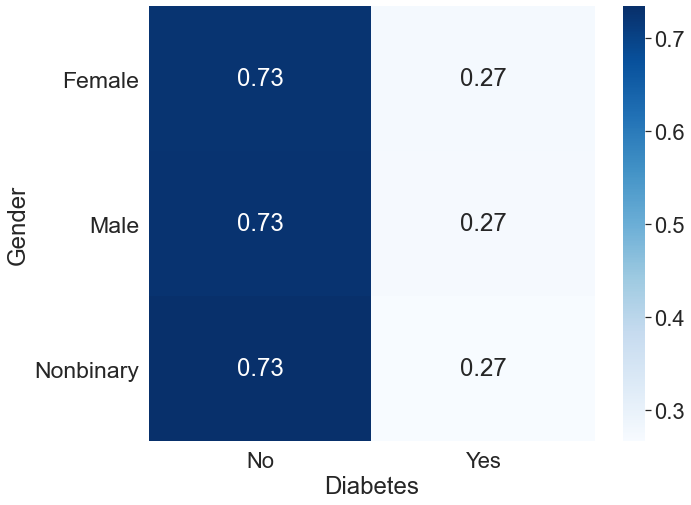

In [20]:
#Two categorical variables
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
g = sns.heatmap(g, annot=True, cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 23)

"Diabetes" has a uniform distribution across the "Gender" categories.

In [21]:
df.TotalCharge.describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

<AxesSubplot:xlabel='TotalCharge', ylabel='ReAdmis'>

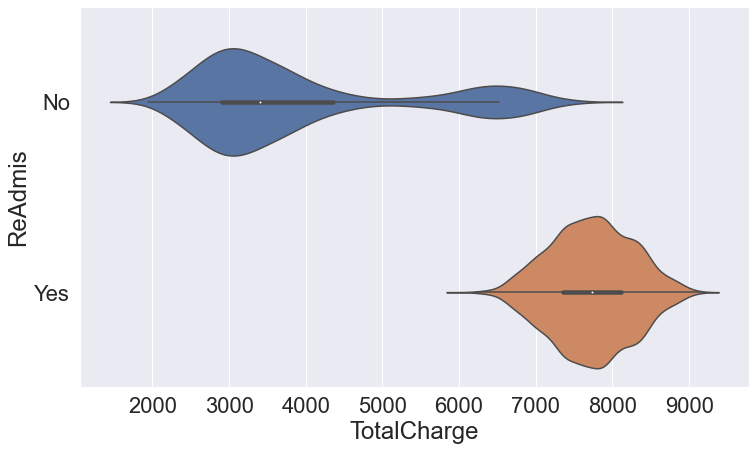

In [22]:
#One categorical one continuous variable.
plt.figure(figsize=(12,7))
sns.violinplot(x="TotalCharge",  y="ReAdmis", data=df)

"TotalCharge" has a bimodal distribution. The right peak correlates with patients that were readmitted.

In [23]:
df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

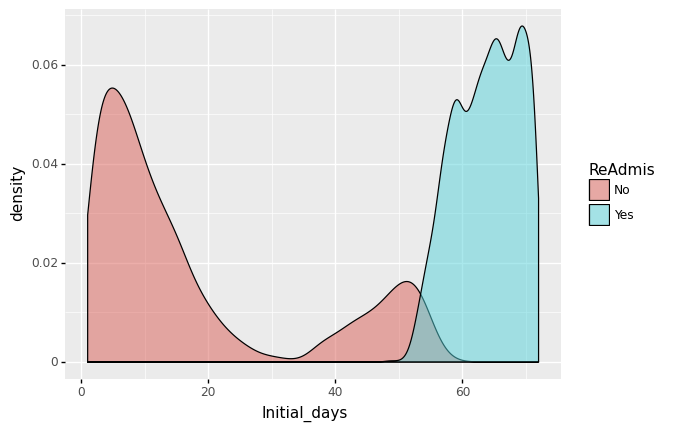

In [24]:
#One categorical one continuous variable
print(p9.ggplot(df)+ p9.aes(x='Initial_days', fill='ReAdmis') + p9.geom_density(alpha=0.5))

"Initial_days" has a bimodal distribution.  The right peak correlates with patients that were readmitted.

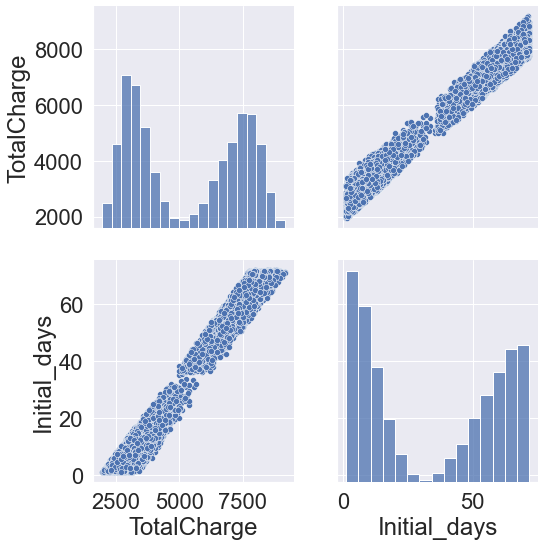

In [25]:
# 2 continuous variables
g = sns.PairGrid(df.loc[:, ('TotalCharge',  'Initial_days')], height= 4)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

Both "TotalCharge" and "Initial_days" have a bimodal distribution and they have a positive linear correlation.

In [26]:
df.Additional_charges.describe()

count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64

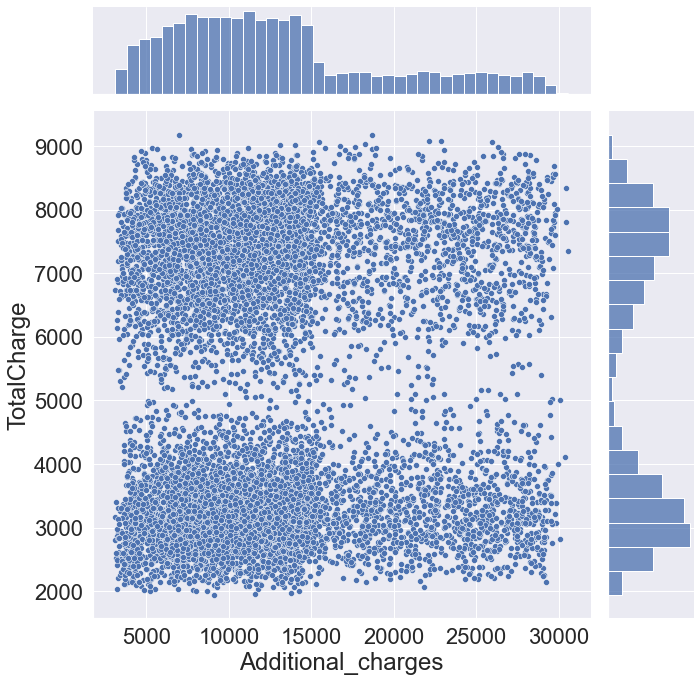

In [27]:
# 2 continuous variables
sns.jointplot(data=df, x="Additional_charges", y="TotalCharge", height=10)

"Additional_charges" distribution is skewed right and has several values that lie outside the third quartile.   "Initial_days" has a bimodal distribution. There is no apparent relationship with "TotalCharge".

#### E.  Summarize the implications of your data analysis by doing the following:

##### 1.  Discuss the results of the hypothesis test.

The p-value generated from the chi-square analysis was 0.0.9989402059725071, significantly higher than the standard statistical significance level of 0.05. Based on this result, I am unable to reject the null hypothesis that there is no relationship between the variables "ReAdmis" and "Diabetes".(Bruce, 2020)

##### 2. Discuss the limitations of your data analysis.

The limitations of this analysis are the lack of information on confounding variables. (Bruce, 2020)  The reasons for initial and subsequent hospitalizations are not included in the dataset.  The extent to which diabetes impacts readmission could be dependent on the primary medical condition that caused the admission. Additionally, there was no information about the severity of the patient's diabetes or how closely it was managed during the admission.

##### 3. Recommend a course of action based on your results.

I recommend gathering additional data points to determine if diabetes is a factor affecting readmission rates.  Quantifying diabetes with tools such as the Diabetes Severity Score (DISSCO) instead of a simple yes or no would be more informative. (Zghebi, 2020) Information such as lab values for blood sugar, medications, and specialty consults for management could reveal if inpatient management impacts readmission rates. (Gregory, 2018) Additionally, adding more information about the primary reason for admission might reveal subsets of patients with increased risk secondary to their history of diabetes.

#### F.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the tool(s) used.

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=e0bbbc98-39f9-4902-8849-ae390123efcb

#### G.  Web sources used to acquire segments of third-party code.

https://stats.stackexchange.com/questions/110718/chi-squared-test-with-scipy-whats-the-difference-between-chi2-contingency-and

https://seaborn.pydata.org/tutorial.html

https://mode.com/example-gallery/python_horizontal_bar/

#### H.  References.

Bevans, Rebecca. (2021). Choosing the Right Statistical Test | Types and Examples. Choosing the Right Statistical Test | Types   
   
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;and Examples (scribbr.com)

Bruce, Peter, et al. (2020) Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python, O'Reilly Media, Incorporated,  2020.   
   
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ProQuest eBook Central, http://ebookcentral.proquest.com/lib/westerngovernors-ebooks/detail.action?docID=6173908.

Gregory NS, Seley JJ, Dargar SK, Galla N, Gerber LM, Lee JI. (2018) Strategies to Prevent Readmission in High-Risk Patients with   
  
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Diabetes: the Importance of an Interdisciplinary Approach. Curr Diab Rep. 2018 Jun 21;18(8):54.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://pubmed.ncbi.nlm.nih.gov/29931547/

Zghebi SS, and others. (2020) Development and validation of the Diabetes Severity Score (DISSCO) in 139626 individuals with type   
   
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  2 diabetes: a retrospective cohort study. BMJ Open Diabetes Res Care.;8:e000962

 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://drc.bmj.com/content/8/1/e000962